# King County Dataset Linear Regression Model 3

### In this model I am going to try to clean up a bit, maybe starting with 'waterfront', 'view', and 'yr_renovated'

In [49]:
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [51]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [52]:
data.waterfront.unique()

array([nan,  0.,  1.])

In [53]:
data.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [54]:
data.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [55]:
data.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [56]:
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)

In [58]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [59]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [60]:
 # This one it's getting stuck on the "NaN's" (also got ride of 'waterfront' and 'yr_renovated')
X = data.drop(["date","sqft_basement"], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [61]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [62]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [64]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 1.4037627009253075e-19
Test Mean Squarred Error: 1.5761396931515358e-19


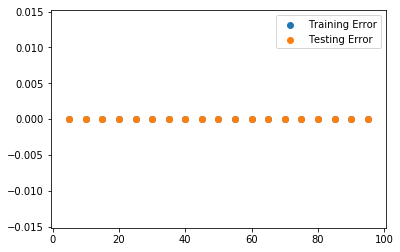

In [65]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+view+waterfront+yr_renovated+floors+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15"
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2891.
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:53:39   Log-Likelihood:            -2.9549e+05
No. Observations:               21597   AIC:                         5.910e+05
Df Residuals:                   21581   BIC:                         5.911e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.891e+06   3.02e+06      1.952      0.051    -2.5e+04    1.18e+07
id            -1.034e-06   5.08e-07     -2.036      0.042   -2.03e-06   -3.85e-08
bedrooms      -4.725e+04   1980.630    -23.857      0.000   -5.11e+04   -4.34e+04
bathrooms      4.933e+04   3376.594     14.608      0.000    4.27e+04    5.59e+04
sqft_living     228.1354      3.275     69.664      0.000     221.717     234.554
sqft_lot          0.1776      0.050      3.519      0.000       0.079       0.276
view           5.752e+04   2200.777     26.136      0.000    5.32e+04    6.18e+04
waterfront     6.106e+05   1.91e+04     32.003      0.000    5.73e+05    6.48e+05
yr_renovated     22.3395      4.134      5.404      0.000      14.237      30.442
floors         4.047e+04   3327.927     12.160      0.000    3.39e+04     4.7e+04
yr_built      -2156.7988     69.906    -30.853      0.000   -2293.820   -2019.777
zipcode        -691.0009     34.479    -20.041      0.000    -758.582    -623.420
lat            6.611e+05   1.11e+04     59.618      0.000    6.39e+05    6.83e+05
long          -2.831e+05   1.35e+04    -20.926      0.000    -3.1e+05   -2.57e+05
sqft_living15    73.0698      3.409     21.435      0.000      66.388      79.752
sqft_lot15       -0.4585      0.077     -5.927      0.000      -0.610      -0.307
==============================================================================
Omnibus:                    16455.795   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128060.275
Skew:                           3.094   Prob(JB):                         0.00
Kurtosis:                      37.861   Cond. No.                     1.13e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-1.318831414658337e-19

## Results

R-squared is better at 0.668 but the P>|t| score still has 'id' messing things up.